# Create a model

# Import Tools

In [1]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ML modules

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDClassifier, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score
#from sklearn.metrics import PredictionErrorDisplay

from pprint import pprint # Look at parameters used by our current forest

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style
plt.style.use('fivethirtyeight')
sns.set_style("darkgrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False})

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3']
sns.set_palette(sns.color_palette(sns_colors))

primary = '#FF6D43'
secondary = '#00135D'

# Import Data

In [2]:
# Import the dataset and load DF
df_ml = pd.read_csv('../data/df_ml.csv')
df_ml

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
0,Volkswagen,Polo GTI,34690.00,Petrol,10.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI
1,Volkswagen,Polo GTI,34950.00,Petrol,1500.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI
2,Volkswagen,Polo GTI,29990.00,Petrol,9000.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,7.40,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
3,Volkswagen,Polo GTI,33989.00,Petrol,3511.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.80,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
4,Volkswagen,Polo GTI,37980.00,Petrol,211.00,Automatic,2023.00,152.00,1.00,Small car,Demonstration vehicle,5.70,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,BMW,i3,24500.00,Electro,41800.00,Automatic,2018.00,135.00,2.00,Small car,Used,0.00,0.00,Gray,1.50,Rear,Small car,5.00,BMW i3
9154,BMW,i3,19750.00,Electro,35846.00,Automatic,2018.00,125.00,1.00,Sedan,Used,0.00,0.00,Black,1.50,Rear,Small car,5.00,BMW i3
9155,BMW,i3,19999.00,Electro,34300.00,Automatic,2018.00,125.00,1.00,Small car,Used,0.00,0.00,Black,1.50,Rear,Small car,5.00,BMW i3
9156,BMW,i3,21999.00,Electro,46000.00,Automatic,2018.00,75.00,2.00,Small car,Used,0.00,0.00,Gray,1.50,Rear,Small car,5.00,BMW i3


## statistics

In [3]:
df_ml.describe()

,price,mileage,registration,hp,owner,consumption,emission,displacement,car_age
count,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00,9158.00
mean,27724.97,63291.24,2018.33,124.07,1.44,5.03,122.21,1.78,4.67
std,11818.15,56821.31,3.24,29.98,0.60,1.59,36.48,0.35,3.24
min,4800.00,0.00,2012.00,41.00,1.00,0.00,0.00,0.00,0.00
25%,18592.50,15818.25,2016.00,110.00,1.00,4.50,118.00,1.50,2.00
50%,25990.00,48366.00,2019.00,120.00,1.00,5.20,126.00,1.97,4.00
75%,35449.75,95807.50,2021.00,140.00,2.00,5.80,140.00,1.98,7.00
max,87985.00,400000.00,2023.00,284.00,4.00,47.00,240.00,3.00,11.00


In [4]:
df_ml[df_ml['price']>35449]

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
4,Volkswagen,Polo GTI,37980.00,Petrol,211.00,Automatic,2023.00,152.00,1.00,Small car,Demonstration vehicle,5.70,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
8,Volkswagen,Polo GTI,36980.00,Petrol,1001.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.60,133.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
10,Volkswagen,Polo GTI,35480.00,Petrol,35.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,7.20,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
13,Volkswagen,Polo GTI,37999.00,Petrol,2900.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.80,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
14,Volkswagen,Polo GTI,35804.00,Petrol,1500.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.70,159.00,Red,1.98,Front,Small car,0.00,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,Volkswagen,Tiguan,49900.00,Petrol,2979.00,Automatic,2023.00,180.00,1.00,SUV,Demonstration vehicle,5.30,149.00,Gray,1.98,Four.w.d,Compact SUV,0.00,Volkswagen Tiguan
9111,Audi,Q3,53490.00,Petrol,3050.00,Automatic,2023.00,110.00,1.00,SUV,Demonstration vehicle,5.80,133.00,Gray,1.50,Front,Compact SUV,0.00,Audi Q3
9112,Audi,Q3,49860.00,Petrol,5900.00,Automatic,2023.00,110.00,1.00,SUV,Demonstration vehicle,5.80,157.00,Gray,1.50,Front,Compact SUV,0.00,Audi Q3
9114,BMW,i3,35890.00,Electro,8300.00,Automatic,2022.00,75.00,1.00,Sedan,Used,0.00,0.00,Blue,1.50,Rear,Small car,1.00,BMW i3


# DF prep

In [5]:
df = df_ml.copy()

In [6]:
# change date from float to date/int
df['registration'] = pd.to_datetime(df['registration'].map('{:.0f}'.format), format='%Y').dt.year

In [7]:
# change columns order
df = df.loc[:, ['make', 'model',  'fuel', 'mileage', 'gear', 'registration',
       'hp', 'owner', 'body', 'car_condition', 'consumption', 'emission',
       'color', 'displacement', 'drive_type', 'car_class', 'car_age', 'car', 'price']]

In [8]:
df.head(3)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,Volkswagen,Polo GTI,Petrol,10.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI,34690.00
1,Volkswagen,Polo GTI,Petrol,1500.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI,34950.00
2,Volkswagen,Polo GTI,Petrol,9000.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,7.40,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI,29990.00


In [9]:
# Change object type of data to Category
obj_cat_list = list(df.select_dtypes(include=['object']).columns)
df[obj_cat_list] = df[obj_cat_list].astype('category')
df.dtypes

make             category
model            category
fuel             category
mileage           float64
gear             category
registration        int64
hp                float64
owner             float64
body             category
car_condition    category
consumption       float64
emission          float64
color            category
displacement      float64
drive_type       category
car_class        category
car_age           float64
car              category
price             float64
dtype: object

In [10]:
#Check the shape of the data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 9158 rows and 19 columns


# Label Encoder

In [11]:
df.head(2)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,Volkswagen,Polo GTI,Petrol,10.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI,34690.00
1,Volkswagen,Polo GTI,Petrol,1500.00,Automatic,2023,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI,34950.00


In [12]:
df.columns

Index(['make', 'model', 'fuel', 'mileage', 'gear', 'registration', 'hp',
       'owner', 'body', 'car_condition', 'consumption', 'emission', 'color',
       'displacement', 'drive_type', 'car_class', 'car_age', 'car', 'price'],
      dtype='object')

In [13]:
## make

le_make = LabelEncoder()
df['make'] = le_make.fit_transform(df['make'])
df['make'].unique()

array([3, 0, 2, 1, 4])

In [14]:
## model

le_model = LabelEncoder()
df['model'] = le_model.fit_transform(df['model'])
df['model'].unique()

array([10,  3,  2,  8,  4,  0,  6,  9,  5,  1,  7, 12, 11, 13, 14, 15])

In [15]:
## fuel

le_fuel = LabelEncoder()
df['fuel'] = le_fuel.fit_transform(df['fuel'])
df['fuel'].unique()

array([2, 0, 1])

In [16]:
## gear

le_gear = LabelEncoder()
df['gear'] = le_gear.fit_transform(df['gear'])
df['gear'].unique()

array([0, 1, 2])

In [17]:
## body

le_body = LabelEncoder()
df['body'] = le_body.fit_transform(df['body'])
df['body'].unique()

array([3, 4, 5, 0, 1, 2])

In [18]:
## car_condition

le_car_condition = LabelEncoder()
df['car_condition'] = le_car_condition.fit_transform(df['car_condition'])
df['car_condition'].unique()

array([2, 1, 0, 4, 3])

In [19]:
## color

le_color = LabelEncoder()
df['color'] = le_color.fit_transform(df['color'])
df['color'].unique()

array([ 6,  1, 12, 10,  2, 11, 13,  7,  4, 14,  5,  8,  0,  3,  9])

In [20]:
## drive_type

le_drive_type = LabelEncoder()
df['drive_type'] = le_drive_type.fit_transform(df['drive_type'])
df['drive_type'].unique()

array([1, 2, 0])

In [21]:
## car class (small - SUV)

le_car_class = LabelEncoder()
df['car_class'] = le_car_class.fit_transform(df['car_class'])
df['car_class'].unique()

array([2, 3, 1, 0])

In [22]:
## car (car_make_model)

le_car_make_model = LabelEncoder()
df['car'] = le_car_make_model.fit_transform(df['car'])
df['car'].unique()
#le.classes_

array([13,  0,  8, 11,  1,  4,  9, 12,  2,  5, 10, 14,  3,  6, 15,  7])

In [23]:
df.head(3)

,make,model,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car,price
0,3,10,2,10.00,0,2023,152.00,1.00,3,2,4.20,138.00,6,1.98,1,2,0.00,13,34690.00
1,3,10,2,1500.00,0,2023,152.00,1.00,3,2,6.60,138.00,1,2.00,2,2,0.00,13,34950.00
2,3,10,2,9000.00,0,2023,152.00,1.00,3,2,7.40,138.00,12,1.98,1,2,0.00,13,29990.00


# Train-Test-Split

In [24]:
# Train-tests-plit Label
X = df.drop(['price', 'car_age', 'car', 'displacement', 'color', 'emission', 'consumption', 'body', 'drive_type', 'owner', 'car_condition'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RSEED)

In [25]:
# Size of train and test set
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5494, 8)
y_train:  (5494,)
X_test:  (3664, 8)
y_test:  (3664,)


# Modelling

## Functions

In [26]:
# Calculate metric

test_metrics = []

def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test, model):
    
    # Metrics on Trining Data
    print("Metrics on training data")
    rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
    r2 = r2_score(y_train,y_pred_train)
    
    print("r2:", round(r2, 2))
    print("RMSE: €", round(rmse, 2))
    print('Mean Absolute Error: €',mean_absolute_error(y_train, y_pred_train).round(2))
    print('Mean Absolute Percentage Error: %',(mean_absolute_percentage_error(y_train, y_pred_train).round(3)))
    print('Median Absolute Error: €',median_absolute_error(y_train, y_pred_train).round(2))
    print("---"*10)

    # Metrics in Test data
    print("Metrics on test data")
    r2_test = r2_score(y_test,y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    med_test = median_absolute_error(y_test, y_pred_test)

    print("r2:", round(r2_test, 2))
    print("RMSE: €", round(rmse_test, 2))
    print('Mean Absolute Error: €',mean_absolute_error(y_test, y_pred_test).round(2))
    print('Mean Absolute Percentage Error: %',mape_test.round(3))
    print('Median Absolute Error: €',med_test.round(2))
    print("---"*10)
    
    metrics_dict = {'model':model, 'r2': r2_test.round(3), 'rmse':rmse_test.round(3),  'med_ae': med_test.round(3), 'mape': mape_test.round(3)}
    
    test_metrics.append(metrics_dict)
    
    df_metrics = pd.DataFrame.from_records(test_metrics)


In [27]:
# residual plots
# Function für residual plot
def error_analysis(y_test, y_pred_test):
    
    # Calculate residuals
    residuals = y_test - y_pred_test

    # Plot real vs. predicted values
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    # True vs. predicted values
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([0, 70000], [0,70000], color="#00135D")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    
    # Residual Scatter Plot
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([0, 70000], [0,0], color="#00135D")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")

#call function()

# Random Forest

In [28]:
# RF normal

rf = RandomForestRegressor(random_state=RSEED)

rf.fit(X_train, y_train)

# y predicted
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Random Forest Metrics:")
print('---'*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test, 'RF')

Random Forest Metrics:
------------------------------
Metrics on training data
r2: 0.99
RMSE: € 1320.2
Mean Absolute Error: € 888.75
Mean Absolute Percentage Error: % 0.033
Median Absolute Error: € 610.47
------------------------------
Metrics on test data
r2: 0.92
RMSE: € 3278.67
Mean Absolute Error: € 2319.43
Mean Absolute Percentage Error: % 0.087
Median Absolute Error: € 1659.69
------------------------------


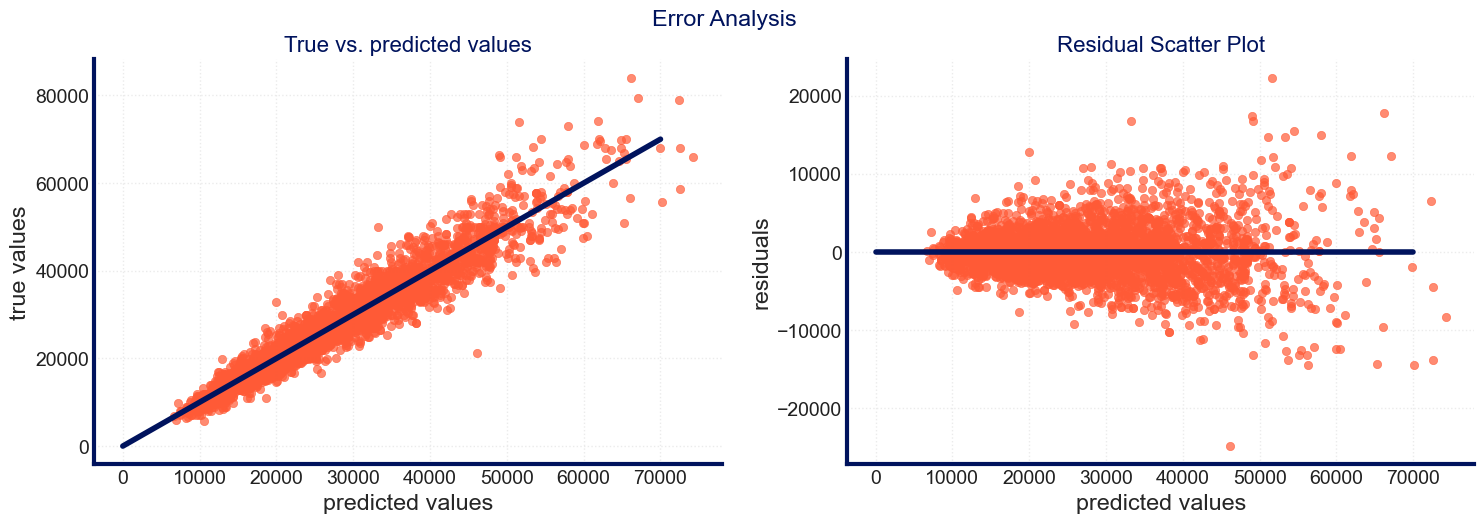

In [29]:
error_analysis(y_test, y_pred_test)

# Df Metrics

In [30]:
df_metrics = pd.DataFrame.from_records(test_metrics)
df_metrics

,model,r2,rmse,med_ae,mape
0,RF,0.92,3278.67,1659.68,0.09


# Redecode Labels

In [31]:
df_ml.iloc[1080:1085, :]

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,car_class,car_age,car
1080,Volkswagen,Golf GTI,26870.00,Petrol,43239.00,Automatic,2020.00,180.00,2.00,Sedan,Used,7.70,142.00,Silver,1.98,Front,Small family car,3.00,Volkswagen Golf GTI
1081,Volkswagen,Golf GTI,37300.00,Petrol,1400.00,Automatic,2020.00,180.00,1.00,Sedan,Used,5.30,149.00,Red,1.98,Front,Small family car,3.00,Volkswagen Golf GTI
1082,Volkswagen,Golf GTI,33500.00,Petrol,8300.00,Automatic,2020.00,180.00,3.00,Sedan,Used,6.30,149.00,White,1.98,Front,Small family car,3.00,Volkswagen Golf GTI
1083,Volkswagen,Golf GTI,32940.00,Petrol,22435.00,Automatic,2020.00,180.00,1.00,Sedan,Used,6.40,149.00,White,1.98,Front,Small family car,3.00,Volkswagen Golf GTI
1084,Volkswagen,Golf GTI,33460.00,Petrol,24000.00,Automatic,2020.00,180.00,1.00,Sedan,Used,6.40,149.00,Black,1.98,Front,Small family car,3.00,Volkswagen Golf GTI


In [32]:
X.head(2)

,make,model,fuel,mileage,gear,registration,hp,car_class
0,3,10,2,10.00,0,2023,152.00,2
1,3,10,2,1500.00,0,2023,152.00,2


In [33]:
# Check ML
X = np.array([['Volkswagen', 'Golf GTI', 'Petrol', 8300, 'Automatic', 2020, 100, 'Small family car']])
X

array([['Volkswagen', 'Golf GTI', 'Petrol', '8300', 'Automatic', '2020',
        '100', 'Small family car']], dtype='<U21')

In [34]:
X[:,0] = le_make.transform(X[:,0])
X[:,1] = le_model.transform(X[:,1])
X[:,2] = le_fuel.transform(X[:,2])
X[:,4] = le_gear.transform(X[:,4])
X[:,7] = le_car_class.transform(X[:,7])
X = X.astype(float)
X

array([[3.00e+00, 8.00e+00, 2.00e+00, 8.30e+03, 0.00e+00, 2.02e+03,
        1.00e+02, 3.00e+00]])

In [35]:
y_pred = rf.predict(X)
y_pred 

array([27653.33])

# Save Model

In [36]:
import pickle

In [ ]:
# save model

data = {
    "model": rf,
    "le_make": le_make,
    "le_model": le_model,
    "le_fuel": le_fuel,
    "le_gear": le_gear,
    "le_car_class": le_car_class
}

#with open ('../streamlit/pkl/saved_rf.pkl', 'wb') as file: pickle.dump(data, file)